### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME"])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts= application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

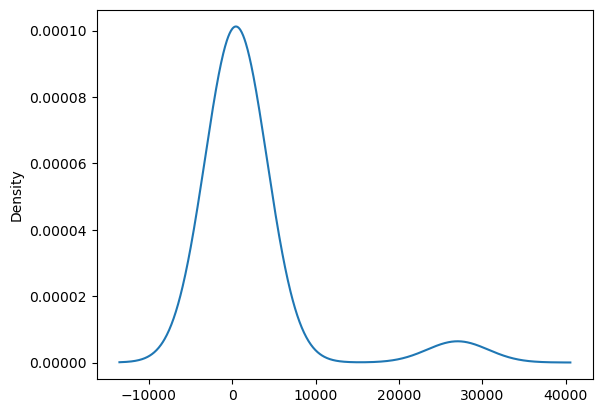

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts= application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

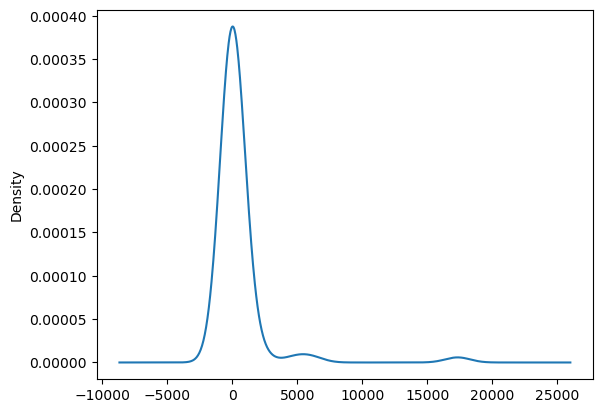

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Montse\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Montse\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
len(X_train_scaled)

25724

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# COMPILE AND TRAIN OUR MODEL USING CHECKPOINTS

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 26:55 - loss: 75.9592 - accuracy: 0.7812
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 4:22 - loss: 18324.1289 - accuracy: 0.6125
Epoch 1: saving model to checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 1:30 - loss: 8382.9541 - accuracy: 0.5649 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 59s - loss: 5660.3931 - accuracy: 0.5391 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 40s - loss: 6220.9136 - accuracy: 0.5198
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 30s - loss: 5652.3662 - accuracy: 0.5031
Epoch 1: saving model 

349/804 [============>.................] - ETA: 5s - loss: 48547.8047 - accuracy: 0.5053
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
355/804 [============>.................] - ETA: 5s - loss: 47840.0742 - accuracy: 0.5057
Epoch 1: saving model to checkpoints\weights.01.hdf5
364/804 [============>.................] - ETA: 5s - loss: 46832.1367 - accuracy: 0.5044
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
370/804 [============>.................] - ETA: 5s - loss: 46174.3125 - accuracy: 0.5034
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
380/804 [=============>................] - ETA: 5s - loss: 45235.1914 - accuracy: 0.5029
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
390/804 [=============>................] - ETA: 4s - loss: 44153.5469 - ac

749/804 [==========================>...] - ETA: 0s - loss: 28699.9180 - accuracy: 0.5033
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 28477.7305 - accuracy: 0.5034
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 28114.4316 - accuracy: 0.5038
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 27779.5820 - accuracy: 0.5045
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
785/804 [============================>.] - ETA: 0s - loss: 27462.5410 - accuracy: 0.5047
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
795/804 [===========

336/804 [===========>..................] - ETA: 3s - loss: 44354.6172 - accuracy: 0.5220
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 43280.1016 - accuracy: 0.5208
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
356/804 [============>.................] - ETA: 2s - loss: 42650.8086 - accuracy: 0.5206
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
366/804 [============>.................] - ETA: 2s - loss: 41962.3828 - accuracy: 0.5209
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
376/804 [=============>................] - ETA: 2s - loss: 40935.4219 - accuracy: 0.5216
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
386/804 [===========


Epoch 2: saving model to checkpoints\weights.02.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 25113.5605 - accuracy: 0.5058
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 24777.1465 - accuracy: 0.5060
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 24459.6582 - accuracy: 0.5067
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 24142.9824 - accuracy: 0.5060
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 23881.2852 - accuracy: 0.5058
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving mod

325/804 [===========>..................] - ETA: 3s - loss: 76681.3516 - accuracy: 0.4894
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 75079.2812 - accuracy: 0.4883
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 72906.7109 - accuracy: 0.4859
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
352/804 [============>.................] - ETA: 3s - loss: 70838.7188 - accuracy: 0.4863
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
362/804 [============>.................] - ETA: 3s - loss: 68886.8750 - accuracy: 0.4857
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
372/804 [===========

727/804 [==========================>...] - ETA: 0s - loss: 34752.0898 - accuracy: 0.4916
Epoch 3: saving model to checkpoints\weights.03.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 34754.3672 - accuracy: 0.4908
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 34426.9531 - accuracy: 0.4912
Epoch 3: saving model to checkpoints\weights.03.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 34108.3906 - accuracy: 0.4914
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 33750.7969 - accuracy: 0.4917
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 33331.3867 - accuracy: 0.4925
Epoch 3: saving model to checkpoints\we


Epoch 4: saving model to checkpoints\weights.04.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 16325.3457 - accuracy: 0.5153
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 15937.0127 - accuracy: 0.5130
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 15724.0225 - accuracy: 0.5125
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 15301.4863 - accuracy: 0.5114
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 14889.3574 - accuracy: 0.5099
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving mod

717/804 [=========================>....] - ETA: 0s - loss: 8478.6162 - accuracy: 0.5092
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8418.5039 - accuracy: 0.5095
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 8305.8496 - accuracy: 0.5091
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8228.8789 - accuracy: 0.5095
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8119.8784 - accuracy: 0.5102
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
763/804 [================

301/804 [==========>...................] - ETA: 3s - loss: 43156.5234 - accuracy: 0.4869
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 42053.1211 - accuracy: 0.4867
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 40889.4297 - accuracy: 0.4868
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 39648.6094 - accuracy: 0.4850
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 38721.3047 - accuracy: 0.4843
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
349/804 [===========

699/804 [=========================>....] - ETA: 0s - loss: 19319.1699 - accuracy: 0.5032
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 19047.8008 - accuracy: 0.5022
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 18909.5684 - accuracy: 0.5017
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 18666.9492 - accuracy: 0.5019
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 18417.8516 - accuracy: 0.5030
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
749/804 [===========

277/804 [=========>....................] - ETA: 3s - loss: 1902.5618 - accuracy: 0.5074
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 1856.9329 - accuracy: 0.5065
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 1796.7117 - accuracy: 0.5094
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 1738.7994 - accuracy: 0.5111
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 1683.8569 - accuracy: 0.5113
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
325/804 [===========>....

683/804 [========================>.....] - ETA: 0s - loss: 1764.4169 - accuracy: 0.5192
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 1747.9926 - accuracy: 0.5185
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 1799.2041 - accuracy: 0.5177
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 1782.9479 - accuracy: 0.5176
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 1759.1530 - accuracy: 0.5166
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
730/804 [================

270/804 [=========>....................] - ETA: 3s - loss: 1414.3501 - accuracy: 0.5157
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 1540.9913 - accuracy: 0.5161
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 1616.4736 - accuracy: 0.5181
Epoch 7: saving model to checkpoints\weights.07.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 1573.9762 - accuracy: 0.5190
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 1570.4873 - accuracy: 0.5189
Epoch 7: saving model to checkpoints\weights.07.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 1531.7491 - accuracy: 0.5176
Epoch 7: saving model to checkpoints\weights.

666/804 [=======================>......] - ETA: 0s - loss: 5012.9194 - accuracy: 0.5152
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 5011.9688 - accuracy: 0.5157
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 5860.5024 - accuracy: 0.5164
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 5859.0938 - accuracy: 0.5159
Epoch 7: saving model to checkpoints\weights.07.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 5867.6943 - accuracy: 0.5160
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 5840.7354 - accuracy

247/804 [========>.....................] - ETA: 4s - loss: 10133.0547 - accuracy: 0.5029
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 9742.9561 - accuracy: 0.5050 
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 9381.3223 - accuracy: 0.5069
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 9184.1807 - accuracy: 0.5071
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 8877.0039 - accuracy: 0.5051
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
297/804 [==========>...

640/804 [======================>.......] - ETA: 1s - loss: 4363.4722 - accuracy: 0.4979
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 4317.8174 - accuracy: 0.4979
Epoch 8: saving model to checkpoints\weights.08.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 4262.8237 - accuracy: 0.4971
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 4247.1460 - accuracy: 0.4968
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 4289.9883 - accuracy: 0.4958
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
687/804 [================

233/804 [=======>......................] - ETA: 3s - loss: 469.7684 - accuracy: 0.5197
Epoch 9: saving model to checkpoints\weights.09.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 465.2370 - accuracy: 0.5200
Epoch 9: saving model to checkpoints\weights.09.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 451.0827 - accuracy: 0.5199
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 441.3308 - accuracy: 0.5217
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 425.3992 - accuracy: 0.5225
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 411.3638 - accuracy: 0.5226
Epoch 9: saving model to checkpoints\weights.09.hdf

623/804 [======================>.......] - ETA: 1s - loss: 561.3661 - accuracy: 0.5224
Epoch 9: saving model to checkpoints\weights.09.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 554.2905 - accuracy: 0.5220
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 548.2281 - accuracy: 0.5222
Epoch 9: saving model to checkpoints\weights.09.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 541.4477 - accuracy: 0.5223
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 535.6588 - accuracy: 0.5229
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 527.5942 - accuracy: 0.5223
Epoch 9: saving model to checkpoints\weights.09.hdf


Epoch 10: saving model to checkpoints\weights.10.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.7022 - accuracy: 0.5336
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.7028 - accuracy: 0.5321
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.7023 - accuracy: 0.5330
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 0.7021 - accuracy: 0.5330
Epoch 10: saving model to checkpoints\weights.10.hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.7029 - accuracy: 0.5311
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
244/804 [========>............

598/804 [=====================>........] - ETA: 1s - loss: 0.6983 - accuracy: 0.5333
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6981 - accuracy: 0.5336
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6978 - accuracy: 0.5344
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6983 - accuracy: 0.5329
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6979 - accuracy: 0.5336
Epoch 10: saving model to checkpoints\weights.10.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6980 - accuracy: 0.5333


175/804 [=====>........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5366
Epoch 11: saving model to checkpoints\weights.11.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5362
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
190/804 [======>.......................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5357
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5366
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5368
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5352



Epoch 11: saving model to checkpoints\weights.11.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6888 - accuracy: 0.5307
Epoch 11: saving model to checkpoints\weights.11.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6888 - accuracy: 0.5307
Epoch 11: saving model to checkpoints\weights.11.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6887 - accuracy: 0.5306
Epoch 11: saving model to checkpoints\weights.11.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6886 - accuracy: 0.5311
Epoch 11: saving model to checkpoints\weights.11.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6887 - accuracy: 0.5308
Epoch 11: saving model to checkpoints\weights.11.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6887 - accuracy: 0.5308
Epoch 11: saving model to checkpoints\weights.11.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6887 - accuracy: 0.5302
Epoch 11: saving model to 

 76/804 [=>............................] - ETA: 7s - loss: 0.6846 - accuracy: 0.5271
Epoch 12: saving model to checkpoints\weights.12.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.6851 - accuracy: 0.5239
Epoch 12: saving model to checkpoints\weights.12.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.6844 - accuracy: 0.5269
Epoch 12: saving model to checkpoints\weights.12.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6853 - accuracy: 0.5239
Epoch 12: saving model to checkpoints\weights.12.hdf5
100/804 [==>...........................] - ETA: 6s - loss: 0.6853 - accuracy: 0.5238
Epoch 12: saving model to checkpoints\weights.12.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6856 - accuracy: 0.5226
Epoch 12: saving model to checkpoints\weights.12.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.6855 - accuracy: 0.5236
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to 


Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6952 - accuracy: 0.5315
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6951 - accuracy: 0.5316
Epoch 12: saving model to checkpoints\weights.12.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6950 - accuracy: 0.5314
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6949 - accuracy: 0.5316
Epoch 12: saving model to checkpoints\weights.12.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6948 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6948 - accuracy: 0.5319


 12/804 [..............................] - ETA: 44s - loss: 0.6890 - accuracy: 0.5469 
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 22/804 [..............................] - ETA: 25s - loss: 0.6917 - accuracy: 0.5270
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 32/804 [>.............................] - ETA: 18s - loss: 0.6916 - accuracy: 0.5273
Epoch 13: saving model to checkpoints\weights.13.hdf5
 41/804 [>.............................] - ETA: 15s - loss: 0.6918 - accuracy: 0.5259
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 47/804 [>.............................] - ETA: 14s - loss: 0.6921 - accuracy: 0.5239
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 57/804 [=>............................] - ETA: 12s - loss: 0.6921 - accuracy: 


Epoch 13: saving model to checkpoints\weights.13.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5252
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5259
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5273
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5278
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5275
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to che


Epoch 14: saving model to checkpoints\weights.14.hdf5
  8/804 [..............................] - ETA: 7s - loss: 0.7026 - accuracy: 0.4492
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6943 - accuracy: 0.5087
Epoch 14: saving model to checkpoints\weights.14.hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5260
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5284
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 43/804 [>.............................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5247
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 53/804 [>....................

408/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5334
Epoch 14: saving model to checkpoints\weights.14.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5327
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5328
Epoch 14: saving model to checkpoints\weights.14.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5322
Epoch 14: saving model to checkpoints\weights.14.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
4

797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 15/100
  1/804 [..............................] - ETA: 4s - loss: 0.6784 - accuracy: 0.6250
Epoch 15: saving model to checkpoints\weights.15.hdf5
  4/804 [..............................] - ETA: 53s - loss: 0.6943 - accuracy: 0.5078
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 14/804 [..............................] - ETA: 16s - loss: 0.6911 - accuracy: 0.5312
Epoch 15: saving model to checkpoints\weights.15.hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.6896 - accuracy: 0.5421
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 29/804 [>.........................


Epoch 15: saving model to checkpoints\weights.15.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5325
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5332
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5340
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5341
Epoch 15: saving model to checkpoints\weights.15.hdf5
424/804 [==============>......

779/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5327
Epoch 15: saving model to checkpoints\weights.15.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 16/100
  1/804 [..............................] - ETA: 4s - loss: 0.6873 - accuracy: 0.5625
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6888 - accuracy: 0.5500
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints

369/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5318
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5323
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5332
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5335
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5329
Epoch 16: saving model to checkpoints\weights.16.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5332



Epoch 16: saving model to checkpoints\weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5330
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5329
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5326
Epoch 16: saving model to checkpoints\weights.16.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5323
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5324
Epoch 16: saving model to checkpoints\weights.16.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6909 - accuracy: 0.5

308/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5297
Epoch 17: saving model to checkpoints\weights.17.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5303
Epoch 17: saving model to checkpoints\weights.17.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5309
Epoch 17: saving model to checkpoints\weights.17.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5310
Epoch 17: saving model to checkpoints\weights.17.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5317
Epoch 17: saving model to checkpoints\weights.17.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5324
Epoch 17: saving model to checkpoints\weights.17.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5315
Epoch 17: saving model to checkpoints\weights.17.hdf5
341/804 [===========>......

641/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5334
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5330
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5331
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5326
Epoch 17: saving model to checkpoints\weights.17.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5325
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5326


216/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5388
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5391
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5396
Epoch 18: saving model to checkpoints\weights.18.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5385
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5378
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5383


593/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5344
Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5344
Epoch 18: saving model to checkpoints\weights.18.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5338
Epoch 18: saving model to checkpoints\weights.18.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5339
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5344
Epoch 18: saving model to 

173/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5307
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5324
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5306
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5306
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5294
Epoch 19: saving model to checkpoints\weights.19.hdf5
218/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5294


598/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5304
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5306
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5304
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5295
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5294
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
648/804 [=====================

210/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5354
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5351
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5373
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5381
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5368
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to che

636/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5298
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5296
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5295
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5297
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5304
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
684/804 [=====================

248/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5343
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5323
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5326
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5319
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5321
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
295/804 [==========>..........

661/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5351
Epoch 21: saving model to checkpoints\weights.21.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5356
Epoch 21: saving model to checkpoints\weights.21.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5353
Epoch 21: saving model to checkpoints\weights.21.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5353
Epoch 21: saving model to checkpoints\weights.21.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5353
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5354
Epoch 21: saving model to checkpoints\weights.21.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5354
Epoch 21: saving model to 

257/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5288
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5276
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5279
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
307/804 [==========>..........


Epoch 22: saving model to checkpoints\weights.22.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che

292/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5359
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
342/804 [===========>.........

715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to che


Epoch 24: saving model to checkpoints\weights.24.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 24: saving model to che

751/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to che

359/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5279
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
410/804 [==============>......

749/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
799/804 [=====================

334/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5319
Epoch 26: saving model to checkpoints\weights.26.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5319
Epoch 26: saving model to checkpoints\weights.26.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5332
Epoch 26: saving model to checkpoints\weights.26.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5339
Epoch 26: saving model to checkpoints\weights.26.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5342
Epoch 26: saving model to checkpoints\weights.26.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5346
Epoch 26: saving model to checkpoints\weights.26.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5344
Epoch 26: saving model to checkpoints\weights.26.hdf5
367/804 [============>.....

708/804 [=========================>....] - ETA: 0s - loss: 0.6901 - accuracy: 0.5343
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6901 - accuracy: 0.5343
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6901 - accuracy: 0.5345
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6901 - accuracy: 0.5339
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6902 - accuracy: 0.5331
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
755/804 [=====================

299/804 [==========>...................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5277
Epoch 27: saving model to checkpoints\weights.27.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5278
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5292
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5297
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5295
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5301


706/804 [=========================>....] - ETA: 0s - loss: 0.6902 - accuracy: 0.5329
Epoch 27: saving model to checkpoints\weights.27.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6901 - accuracy: 0.5331
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6901 - accuracy: 0.5335
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6902 - accuracy: 0.5329
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6902 - accuracy: 0.5326
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.5330



Epoch 28: saving model to checkpoints\weights.28.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to che


Epoch 28: saving model to checkpoints\weights.28.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to che

298/804 [==========>...................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5371
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5350
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333


703/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
753/804 [=====================

278/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
324/804 [===========>.........

659/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weights.30.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 30: saving model to checkpoints\weights.30.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 30: saving model to checkpoints\weights.30.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
7

210/804 [======>.......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5277
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5274
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5268
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5276
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5274
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
260/804 [========>............

623/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
670/804 [=====================

226/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5264
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5264
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5268
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 32: saving model to checkpoints\weights.32.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283


626/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 32: saving model to checkpoints\weights.32.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333



Epoch 33: saving model to checkpoints\weights.33.hdf5
212/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5276
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5284
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to che

602/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weights.33.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308


178/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 34: saving model to checkpoints\weights.34.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327


557/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 34: saving model to checkpoints\weights.34.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306


137/804 [====>.........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5365
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5356
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5355
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5364
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5384
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
184/804 [=====>...............

544/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 35: saving model to checkpoints\weights.35.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300


140/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5321
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5323
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5316
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5311
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5307
Epoch 36: saving model to checkpoints\weights.36.hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5306


542/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 36: saving model to checkpoints\weights.36.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314


123/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5305
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5298
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5316
Epoch 37: saving model to checkpoints\weights.37.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311


516/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
566/804 [====================>

101/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5278
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
107/804 [==>...........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5304
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5304
Epoch 38: saving model to checkpoints\weights.38.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5328
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5310
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279


487/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 38: saving model to checkpoints\weights.38.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351


 63/804 [=>............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5213
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 73/804 [=>............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5184
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 83/804 [==>...........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5211
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5245
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5258
Epoch 39: saving model to checkpoints\weights.39.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5276



Epoch 39: saving model to checkpoints\weights.39.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 39: saving model to checkpoints\weights.39.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 39: saving model to checkpoints\weights.39.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304


 49/804 [>.............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5376
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 59/804 [=>............................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5418
Epoch 40: saving model to checkpoints\weights.40.hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5446
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5393
Epoch 40: saving model to checkpoints\weights.40.hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5393
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5390
Epoch 40: saving model to checkpoints\weights.40.hdf5
 

439/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
489/804 [=================>...

 35/804 [>.............................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5098
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5188
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6928 - accuracy: 0.5188
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
 65/804 [=>............................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5212
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5254
Epoch 41: saving model to checkpoints\weights.41.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5250


430/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 41: saving model to checkpoints\weights.41.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 41: saving model to checkpoints\weights.41.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 41: saving model to checkpoints\weights.41.hdf5



 19/804 [..............................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5395
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 26/804 [..............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5397
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5399
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5251
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5229
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 66/804 [=>...................

421/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 42: saving model to checkpoints\weights.42.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 42: saving model to checkpoints\weights.42.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 42: saving model to checkpoints\weights.42.hdf5



 11/804 [..............................] - ETA: 9s - loss: 0.6924 - accuracy: 0.5227 
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 17/804 [..............................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5276
Epoch 43: saving model to checkpoints\weights.43.hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5325
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 32/804 [>.............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5312
Epoch 43: saving model to checkpoints\weights.43.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5404
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5379
Epoch 43: saving model to checkpoints\weights.43.hdf5



Epoch 43: saving model to checkpoints\weights.43.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 43: saving model to checkpoints\weights.43.hdf5
466/804 [================>....


Epoch 44: saving model to checkpoints\weights.44.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6812 - accuracy: 0.6094
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5330
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5357
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5444
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5482
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to che


Epoch 44: saving model to checkpoints\weights.44.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to che

  1/804 [..............................] - ETA: 4s - loss: 0.6872 - accuracy: 0.5625
Epoch 45: saving model to checkpoints\weights.45.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.6880 - accuracy: 0.5562
Epoch 45: saving model to checkpoints\weights.45.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6852 - accuracy: 0.5767 
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 19/804 [..............................] - ETA: 7s - loss: 0.6851 - accuracy: 0.5773
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6869 - accuracy: 0.5636
Epoch 45: saving model to checkpoints\weights.45.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6881 - accuracy: 0.5543
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

393/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 45: saving model to checkpoints\weights.45.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5333



Epoch 45: saving model to checkpoints\weights.45.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 45: saving model to checkpoints\weights.45.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 45: saving model to checkpoints\weights.45.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 46/100
  1/804 [..............................] - ETA: 5s - loss: 0.6792 - accuracy: 0.6250
Epoch 46: saving model to checkpoints\weights.46.hdf5
  5/804 [.............................

337/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 46: saving model to checkpoints\weights.46.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 46: saving model to checkpoints\weights.46.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 46: saving model to checkpoints\weights.46.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5319
Epoch 46: saving model to checkpoints\weights.46.hdf5
376/804 [=============>................] - ETA: 3s - los

700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
750/804 [=====================

269/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5270
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5285
Epoch 47: saving model to checkpoints\weights.47.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 47: saving model to checkpoints\weights.47.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5295
Epoch 47: saving model to checkpoints\weights.47.hdf5




Epoch 47: saving model to checkpoints\weights.47.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weights.47.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334


237/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5351
Epoch 48: saving model to checkpoints\weights.48.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5379
Epoch 48: saving model to checkpoints\weights.48.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5376
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5379
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5378
Epoch 48: saving model to checkpoints\weights.48.hdf5
2

587/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 48: saving model to checkpoints\weights.48.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 48: saving model to checkpoints\weights.48.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 48: saving model to checkpoints\weights.48.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 48: saving model to checkpoints\weights.48.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 48: saving model to checkpoints\weights.48.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 48: saving model to checkpoints\weights.48.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 48: saving model to checkpoints\weights.48.hdf5
626/804 [==================

127/804 [===>..........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5231
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5190
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5205
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5190
Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5190
Epoch 49: saving model to checkpoints\weights.49.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5177
Epoch 49: saving model to checkpoints\weights.49.hdf5



508/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5260
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5261
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5264
Epoch 49: saving model to checkpoints\weights.49.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5282
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277


 57/804 [=>............................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5186
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 64/804 [=>............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5269
Epoch 50: saving model to checkpoints\weights.50.hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5234
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5309
Epoch 50: saving model to checkpoints\weights.50.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5277
Epoch 50: saving model to checkpoints\weights.50.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5271
Epoch 50: saving model to checkpoints\weights.50.hdf5
 95/804 [==>...........................] - ETA: 6s - los

444/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 50: saving model to checkpoints\weights.50.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 50: saving model to checkpoints\weights.50.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 50: saving model to checkpoints\weights.50.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 50: saving model to checkpoints\weights.50.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 50: saving model to checkpoints\weights.50.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 50: saving model to checkpoints\weights.50.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 50: saving model to checkpoints\weights.50.hdf5
479/804 [================>.


Epoch 51: saving model to checkpoints\weights.51.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5479 
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6885 - accuracy: 0.5512
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5473
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5431
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6891 - accuracy: 0.5466
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to ch

420/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 51: saving model to checkpoints\weights.51.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 51: saving model to checkpoints\weights.51.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 51: saving model to checkpoints\weights.51.hdf5



 11/804 [..............................] - ETA: 4s - loss: 0.6841 - accuracy: 0.5852 
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.6875 - accuracy: 0.5595
Epoch 52: saving model to checkpoints\weights.52.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6877 - accuracy: 0.5579
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 0.6865 - accuracy: 0.5660
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.6875 - accuracy: 0.5584
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.6884 - accuracy: 0.5525

420/804 [==============>...............] - ETA: 3s - loss: 0.6902 - accuracy: 0.5391
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5379
Epoch 52: saving model to checkpoints\weights.52.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5367
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5367


 12/804 [..............................] - ETA: 10s - loss: 0.6951 - accuracy: 0.4974 
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6940 - accuracy: 0.5071 
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5098
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 42/804 [>.............................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5067
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 52/804 [>.............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5090
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 62/804 [=>................

407/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
457/804 [================>....

  7/804 [..............................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5536
Epoch 54: saving model to checkpoints\weights.54.hdf5
 12/804 [..............................] - ETA: 7s - loss: 0.6890 - accuracy: 0.5495
Epoch 54: saving model to checkpoints\weights.54.hdf5
 17/804 [..............................] - ETA: 7s - loss: 0.6873 - accuracy: 0.5625
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 23/804 [..............................] - ETA: 7s - loss: 0.6876 - accuracy: 0.5598
Epoch 54: saving model to checkpoints\weights.54.hdf5
 29/804 [>.............................] - ETA: 7s - loss: 0.6886 - accuracy: 0.5517
Epoch 54: saving model to checkpoints\weights.54.hdf5
 33/804 [>.............................] - ETA: 7s - loss: 0.6880 - accuracy: 0.5568
Epoch 54: saving model to checkpoints\weights.54.hdf5
 40/804 [>.............................] - ETA: 7s - loss: 0.6880 - accuracy: 0.5562
Epoch 54: saving model to 

386/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 54: saving model to checkpoints\weights.54.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352


783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 54: saving model to checkpoints\weights.54.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 54: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 55/100
  1/804 [..............................] - ETA: 4s - loss: 0.6874 - accuracy: 0.5625
Epoch 55: saving model to checkpoints\weights.55.hdf5
  4/804 [..............................] - ETA: 31s - loss: 0.6941 - accuracy: 0.5078
Epoch 55: saving model to checkpoints\weights.55.hdf5
 11/804 [..............................] - ETA: 13s - loss: 0.6933 - accuracy: 0.5142
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 


Epoch 55: saving model to checkpoints\weights.55.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 55: saving model to checkpoints\weights.55.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
429/804 [===============>.....

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 56/100
  1/804 [..............................] - ETA: 4s - loss: 0.6955 - accuracy: 0.5000
Epoch 56: saving model to checkpoints\weights.56.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5139
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5188
Epoch 56: saving model to checkpoints\weights.56.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.6925 - accuracy: 0.5219
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 30/804 [>.............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5219
Epoch 56

400/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
450/804 [===============>.....


Epoch 57: saving model to checkpoints\weights.57.hdf5
  1/804 [..............................] - ETA: 26s - loss: 0.6997 - accuracy: 0.4688
Epoch 57: saving model to checkpoints\weights.57.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5234 
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5371
Epoch 57: saving model to checkpoints\weights.57.hdf5
 25/804 [..............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5325
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5343
Epoch 57: saving model to checkpoints\weights.57.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5339
Epoch 57: saving model to checkpoints\weights.57.hdf5

369/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5336
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
416/804 [==============>......

776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 57: saving model to checkpoints\weights.57.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 58/100
  1/804 [..............................] - ETA: 4s - loss: 0.7032 - accuracy: 0.4375
Epoch 58: saving model to checkpoints\weights.58.hdf5
  2/804 [..............................] - ETA: 50s - loss: 0.6952 - accuracy: 0.5000
Epoch 58: saving model to checkpoints\weights.58.hdf5
  7/804 [..............................] - ETA: 25s - loss: 0.6912 - accuracy: 0.5312
Epoch 


Epoch 58: saving model to checkpoints\weights.58.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5370
Epoch 58: saving model to checkpoints\weights.58.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5367
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5364
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
417/804 [==============>......

766/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 59/100
  1/804 [..............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 59: saving model to checkpoints

353/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 59: saving model to checkpoints\weights.59.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 59: saving model to checkpoints\weights.59.hdf5



748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326



Epoch 60: saving model to checkpoints\weights.60.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
389/804 [=============>.......

739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 60: saving model to checkpoints\weights.60.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60.hdf5



330/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5366
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5370
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5373
Epoch 61: saving model to checkpoints\weights.61.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5382


710/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 61: saving model to checkpoints\weights.61.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 61: saving model to checkpoints\weights.61.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 61: saving model to checkpoints\weights.61.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
7

280/804 [=========>....................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5391
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5390
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5390
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5395
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5395
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
326/804 [===========>.........

671/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 62: saving model to checkpoints\weights.62.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332


251/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5288
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5289
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5288
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5288
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5302
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
297/804 [==========>..........


Epoch 63: saving model to checkpoints\weights.63.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5348
Epoch 63: saving model to checkpoints\weights.63.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
692/804 [=====================

232/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 64: saving model to checkpoints\weights.64.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5299
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5296
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322


612/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 64: saving model to checkpoints\weights.64.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 64: saving model to checkpoints\weights.64.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 64: saving model to checkpoints\weights.64.hdf5



174/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5314
Epoch 65: saving model to checkpoints\weights.65.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5318
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
189/804 [======>.......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 65: saving model to checkpoints\weights.65.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5365
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 65: saving model to checkpoints\weights.65.hdf5
212/804 [======>.......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5361
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
2

554/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329


130/804 [===>..........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5433
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5424
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
150/804 [====>.........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5402
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
160/804 [====>.........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5389
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5388
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
180/804 [=====>...............

545/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
595/804 [=====================

146/804 [====>.........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5383
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
166/804 [=====>........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5364
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5376
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
196/804 [======>..............


Epoch 67: saving model to checkpoints\weights.67.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che

162/804 [=====>........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5390
Epoch 68: saving model to checkpoints\weights.68.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
177/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5397
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5399
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5411
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5406


572/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 68: saving model to checkpoints\weights.68.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310


168/804 [=====>........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
188/804 [======>.......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
218/804 [=======>.............

573/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 69: saving model to checkpoints\weights.69.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 69: saving model to checkpoints\weights.69.hdf5
617/804 [======================>.......] - ETA: 1s - los

149/804 [====>.........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5419
Epoch 70: saving model to checkpoints\weights.70.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5433
Epoch 70: saving model to checkpoints\weights.70.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5417
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5416
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5386
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5394
Epoch 70: saving model to checkpoints\weights.70.hdf5
1


Epoch 70: saving model to checkpoints\weights.70.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5348
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 70: saving model to checkpoints\weights.70.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 70: saving model to checkpoints\weights.70.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337



Epoch 71: saving model to checkpoints\weights.71.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5188
Epoch 71: saving model to checkpoints\weights.71.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5312
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5337
Epoch 71: saving model to checkpoints\weights.71.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5372
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5348
Epoch 71: saving model to checkpoints\weights.71.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5355
Epoch 71: saving model to checkpoints\weights.71.hdf5



380/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 71: saving model to checkpoints\weights.71.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71.hdf5



765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 71: saving model to checkpoints\weights.71.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 72/100

Epoch 72: saving model to checkpoints\weights.72.hdf5
  1/804 [.............................

327/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5380
Epoch 72: saving model to checkpoints\weights.72.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5382
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 72: saving model to checkpoints\weights.72.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5380
Epoch 72: saving model to checkpoints\weights.72.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 72: saving model to checkpoints\weights.72.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5374
Epoch 72: saving model to checkpoints\weights.72.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5371
Epoch 72: saving model to 

664/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 72: saving model to checkpoints\weights.72.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 72: saving model to checkpoints\weights.72.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 72: saving model to checkpoints\weights.72.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 72: saving model to checkpoints\weights.72.hdf5
703/804 [=========================>....] - ETA: 0s - los


Epoch 73: saving model to checkpoints\weights.73.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5316
Epoch 73: saving model to checkpoints\weights.73.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
277/804 [=========>...........

632/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 73: saving model to checkpoints\weights.73.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 73: saving model to checkpoints\weights.73.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 73: saving model to checkpoints\weights.73.hdf5
6

213/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 74: saving model to checkpoints\weights.74.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
228/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5266
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5268
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5299
Epoch 74: saving model to checkpoints\weights.74.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5306
Epoch 74: saving model to checkpoints\weights.74.hdf5



607/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 74: saving model to checkpoints\weights.74.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342


189/804 [======>.......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5368
Epoch 75: saving model to checkpoints\weights.75.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362


584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 75: saving model to checkpoints\weights.75.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324


165/804 [=====>........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5350
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5328
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 76: saving model to checkpoints\weights.76.hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343


565/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
615/804 [=====================

144/804 [====>.........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5397
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5390
Epoch 77: saving model to checkpoints\weights.77.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5388
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5385
Epoch 77: saving model to checkpoints\weights.77.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5403
Epoch 77: saving model to checkpoints\weights.77.hdf5



536/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 77: saving model to checkpoints\weights.77.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 77: saving model to checkpoints\weights.77.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 77: saving model to checkpoints\weights.77.hdf5
5

116/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5326
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5356
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
132/804 [===>..........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 78: saving model to checkpoints\weights.78.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 78: saving model to checkpoints\weights.78.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 78: saving model to checkpoints\weights.78.hdf5



507/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 78: saving model to checkpoints\weights.78.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 78: saving model to checkpoints\weights.78.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 78: saving model to checkpoints\weights.78.hdf5



 87/804 [==>...........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5219
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5228
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5258
Epoch 79: saving model to checkpoints\weights.79.hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5246
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5259


488/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 79: saving model to checkpoints\weights.79.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 79: saving model to checkpoints\weights.79.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 79: saving model to checkpoints\weights.79.hdf5
5

 57/804 [=>............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5400
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5449
Epoch 80: saving model to checkpoints\weights.80.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5482
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5443
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5390
Epoch 80: saving model to checkpoints\weights.80.hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5392
Epoch 80: saving model to checkpoints\weights.80.hdf5
1

409/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 80: saving model to checkpoints\weights.80.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 80: saving model to checkpoints\weights.80.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 80: saving model to checkpoints\weights.80.hdf5




Epoch 80: saving model to checkpoints\weights.80.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weights.80.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weights.80.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80.hdf5
800/804 [============================>.] - ETA: 0s - los

325/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5270
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5265
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5253
Epoch 81: saving model to checkpoints\weights.81.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5237
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5232
Epoch 81: saving model to checkpoints\weights.81.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5228
Epoch 81: saving model to checkpoints\weights.81.hdf5



725/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5332
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 81: saving model to checkpoints\weights.81.hdf5




Epoch 82: saving model to checkpoints\weights.82.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5412
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5419
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5406
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5401
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5403
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che

711/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5332
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 82: saving model to checkpoints\weights.82.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5324
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 82: saving model to checkpoints\weights.82.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82.hdf5



292/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5279
Epoch 83: saving model to checkpoints\weights.83.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5287
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293


682/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 83: saving model to checkpoints\weights.83.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints\weights.83.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 83: saving model to checkpoints\weights.83.hdf5




Epoch 84: saving model to checkpoints\weights.84.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 84: saving model to checkpoints\weights.84.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5339
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5345
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5352
Epoch 84: saving model to checkpoints\weights.84.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346


658/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
708/804 [=====================


Epoch 85: saving model to checkpoints\weights.85.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 85: saving model to checkpoints\weights.85.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 85: saving model to checkpoints\weights.85.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325


654/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 85: saving model to checkpoints\weights.85.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 85: saving model to checkpoints\weights.85.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5



230/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 86: saving model to checkpoints\weights.86.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303


630/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 86: saving model to checkpoints\weights.86.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328


221/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 87: saving model to checkpoints\weights.87.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 87: saving model to checkpoints\weights.87.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 87: saving model to checkpoints\weights.87.hdf5



616/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 87: saving model to checkpoints\weights.87.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 87: saving model to checkpoints\weights.87.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 87: saving model to checkpoints\weights.87.hdf5
6

197/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 88: saving model to checkpoints\weights.88.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319


592/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 88: saving model to checkpoints\weights.88.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 88: saving model to checkpoints\weights.88.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 88: saving model to checkpoints\weights.88.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 88: saving model to checkpoints\weights.88.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
632/804 [======================>.......] - ETA: 1s - los


Epoch 89: saving model to checkpoints\weights.89.hdf5
173/804 [=====>........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5415
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5396
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 89: saving model to checkpoints\weights.89.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5404
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 89: saving model to checkpoints\weights.89.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5377


564/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 89: saving model to checkpoints\weights.89.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 89: saving model to checkpoints\weights.89.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 89: saving model to checkpoints\weights.89.hdf5



144/804 [====>.........................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5467
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5446
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5461
Epoch 90: saving model to checkpoints\weights.90.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5436
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
179/804 [=====>........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5431
Epoch 90: saving model to checkpoints\weights.90.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5428
Epoch 90: saving model to checkpoints\weights.90.hdf5




Epoch 90: saving model to checkpoints\weights.90.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5302
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 90: saving model to checkpoints\weights.90.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5302
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 90: saving model to checkpoints\weights.90.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5292
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294


 84/804 [==>...........................] - ETA: 7s - loss: 0.6892 - accuracy: 0.5465
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.6893 - accuracy: 0.5458
Epoch 91: saving model to checkpoints\weights.91.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 0.6890 - accuracy: 0.5477
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5464
Epoch 91: saving model to checkpoints\weights.91.hdf5
114/804 [===>..........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5422
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5432
Epoch 91: saving model to checkpoints\weights.91.hdf5
1

485/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5373
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5371
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5371
Epoch 91: saving model to checkpoints\weights.91.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5372
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5375


 76/804 [=>............................] - ETA: 5s - loss: 0.6886 - accuracy: 0.5518
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6889 - accuracy: 0.5494
Epoch 92: saving model to checkpoints\weights.92.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5491
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5476
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5487
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6889 - accuracy: 0.5493


476/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 92: saving model to checkpoints\weights.92.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92.hdf5




Epoch 93: saving model to checkpoints\weights.93.hdf5
 62/804 [=>............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5192
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.6928 - accuracy: 0.5182
Epoch 93: saving model to checkpoints\weights.93.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6928 - accuracy: 0.5180
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5259
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5267
Epoch 93: saving model to checkpoints\weights.93.hdf5
106/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5274


457/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 93: saving model to checkpoints\weights.93.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 93: saving model to checkpoints\weights.93.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 93: saving model to checkpoints\weights.93.hdf5



 43/804 [>.............................] - ETA: 5s - loss: 0.6879 - accuracy: 0.5560
Epoch 94: saving model to checkpoints\weights.94.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6885 - accuracy: 0.5514
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 58/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5388
Epoch 94: saving model to checkpoints\weights.94.hdf5
 65/804 [=>............................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5418
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5368
Epoch 94: saving model to checkpoints\weights.94.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5332
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 


Epoch 94: saving model to checkpoints\weights.94.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 94: saving model to checkpoints\weights.94.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337


 39/804 [>.............................] - ETA: 5s - loss: 0.6888 - accuracy: 0.5505
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5421
Epoch 95: saving model to checkpoints\weights.95.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5391
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5415
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5435
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5432



Epoch 95: saving model to checkpoints\weights.95.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 95: saving model to checkpoints\weights.95.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 95: saving model to checkpoints\weights.95.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332


 35/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5330
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5319
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5335
Epoch 96: saving model to checkpoints\weights.96.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5380
Epoch 96: saving model to checkpoints\weights.96.hdf5
 69/804 [=>............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5408
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6893 - accuracy: 0.5462
Epoch 96: saving model to checkpoints\weights.96.hdf5



435/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 96: saving model to checkpoints\weights.96.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5313
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314


 21/804 [..............................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5223
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5232
Epoch 97: saving model to checkpoints\weights.97.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5328
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5326
Epoch 97: saving model to checkpoints\weights.97.hdf5
 51/804 [>.............................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5362
Epoch 97: saving model to checkpoints\weights.97.hdf5
 58/804 [=>............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5286
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 

399/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5350
Epoch 97: saving model to checkpoints\weights.97.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 97: saving model to checkpoints\weights.97.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5357
Epoch 97: saving model to checkpoints\weights.97.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5350
Epoch 97: saving model to checkpoints\weights.97.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5358
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
436/804 [===============>..............] - ETA: 3s - los

766/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 97: saving model to checkpoints\weights.97.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 97: saving model to checkpoints\weights.97.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 97: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 98/100
  1/804 [..............................] - ETA: 4s - loss: 0.6800 - accuracy: 0.6250
Epoch 98

347/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 98: saving model to checkpoints\weights.98.hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 98: saving model to checkpoints\weights.98.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 98: saving model to checkpoints\weights.98.hdf5
3

711/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 98: saving model to checkpoints\weights.98.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 98: saving model to checkpoints\weights.98.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 98: saving model to checkpoints\weights.98.hdf5
7

262/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5298
Epoch 99: saving model to checkpoints\weights.99.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5294
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5285
Epoch 99: saving model to checkpoints\weights.99.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5278
Epoch 99: saving model to checkpoints\weights.99.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5279
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5276
Epoch 99: saving model to checkpoints\weights.99.hdf5
300/804 [==========>...................] - ETA: 4s - los

605/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 99: saving model to checkpoints\weights.99.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 99: saving model to checkpoints\weights.99.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 99: saving model to checkpoints\weights.99.hdf5
646/804 [=======================>......] - ETA: 1s - los

139/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5304
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
159/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 100: saving model to checkpoints\weights.100.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5316
Epoch 100: saving model to checkpoints\weights.100.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5305
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5319
Epoch 100: saving model to checkpoints\

533/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 100: saving model to checkpoints\weights.100.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6913 -

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 0.7378 - accuracy: 0.5324 - 3s/epoch - 13ms/step
Loss: 0.7377955317497253, Accuracy: 0.5323615074157715


In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")